In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

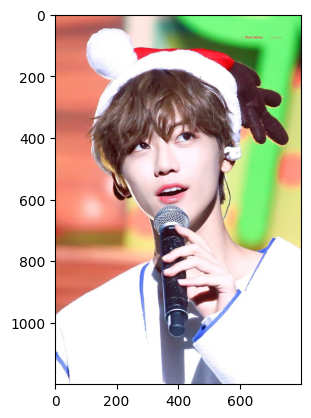

In [2]:
my_image_path = os.getenv('HOME')+'/development/Aiffel/Aiffel_Online5/Exploration3/images/image.jpg'
img_bgr = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()
plt.imshow(img_rgb)
plt.show()

In [3]:
detector_hog = dlib.get_frontal_face_detector()

In [4]:
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(205, 313) (526, 634)]]


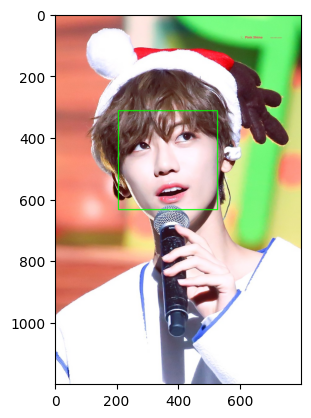

In [5]:
print(dlib_rects)
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t),(r,b),(0,255,0),2, lineType=cv2.LINE_AA)

plt.imshow(img_show)
plt.show()

In [6]:
model_path = os.getenv('HOME')+'/development/Aiffel/Aiffel_Online5/Exploration3/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [7]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


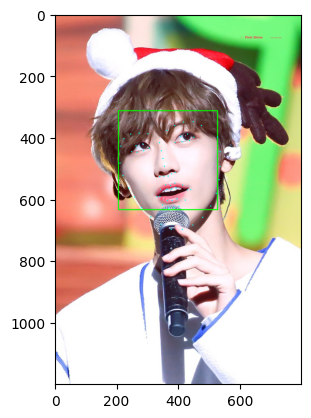

In [8]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,255), -1)

plt.imshow(img_show)
plt.show()

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print(f'(x,y) : ({x},{y})')
    print(f'(w,h) : ({w},{h})')

(354, 493)
(x,y) : (354,493)
(w,h) : (322,322)


In [10]:
sticker_path = os.getenv('HOME')+'/development/Aiffel/Aiffel_Online5/Exploration3/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(322, 322, 3)


In [11]:
refined_x = (x - w // 2)
refined_y = y - h // 2
print(f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (193,332)


In [28]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], \
                        refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8), 0.5, 0)

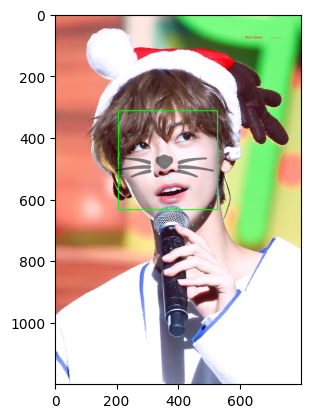

In [29]:
plt.imshow(img_show)
plt.show()